In [63]:
import autograd.numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn


In [296]:
def linear_model(x, weights):
    return weights[0] + np.sum(x*weights[1:])

xSet = [rnd.normal(size = 4) for i in xrange(50)]

optw = rnd.randint(-10, 10, size = 5)
ySet = np.array([linear_model(x, optw) for x in xSet]) + rnd.normal(size = len(xSet))
print(optw)

[-7  5 -3  6  7]


In [297]:
S = zip(xSet, ySet)

In [298]:
S[:6]

[(array([ 0.67942572,  1.04257208, -0.08013722,  0.24819409]),
  -5.4702271482215172),
 (array([-1.08146085,  0.34226825, -0.55247319, -0.51349382]),
  -18.827695386022889),
 (array([-2.32141116,  2.17526526,  1.61933495,  1.87071231]),
  -2.2103715309436738),
 (array([-1.6118039 , -0.73814805, -0.16514536, -1.13833499]),
  -21.564179391245617),
 (array([ 0.03425617, -1.97222134, -1.01608634,  0.2830557 ]),
  -5.1340346190756998),
 (array([-0.52872643,  0.50847777,  0.6577813 ,  0.05874157]),
  -4.8020491274104256)]

In [299]:
theta = rnd.randint(-10, 10, size = 5) + rnd.normal(size = 5)

In [300]:
predictedY = [linear_model(x, theta) for x in xSet]

In [301]:
np.sum((predictedY - ySet)**2)

20417.403651394608

In [312]:
def objective_function(w, S):
    return np.sum([(linear_model(x, w) - y)**2 for x,y in S]) + np.sqrt(np.sum(w**2))

In [313]:
objective_function(theta, S)

41.293619660765373

In [314]:
# Automatic Differentiation !
from autograd import grad
dx = grad(objective_function)

# classic gradient descent
theta = rnd.normal(size = 5)#rnd.randint(-10, 10, size = 5) + rnd.normal(size = 5)*50
error = [objective_function(theta, S)]
for epoch in xrange(10):
    rnd.shuffle(S)
    for i in xrange(30):
        theta -= 0.01*dx(theta, S)
        error.append(objective_function(theta, S))

In [315]:
print(theta)
print(optw)


[  1.01132626e+10   3.67234853e+10   4.71776157e+09  -1.00741958e+10
  -1.92748366e+10]
[-7  5 -3  6  7]


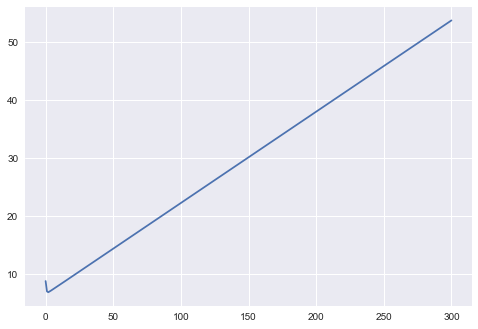

In [316]:
plt.plot(np.log(error))
plt.show()

In [317]:
error[:6]

[6520.497470047806,
 1088.3499463775502,
 955.87722971006451,
 1089.4073120836231,
 1267.3744793434175,
 1477.9354860544936]

In [318]:
theta = rnd.normal(size = 5)#rnd.randint(-10, 10, size = 5) + rnd.normal(size = 5)*50
error = [objective_function(theta, S)]

for epoch in xrange(10):
    rnd.shuffle(S)
    for i in xrange(30):
        for j in xrange(len(S)):
            x = S[j:j+1] # print(S[j:j+1])
            theta -= 0.01*dx(theta, x)
            error.append(objective_function(theta, x))

[-6.54652825  4.80066526 -2.91432757  5.98493238  6.7019167 ]
[-7  5 -3  6  7]


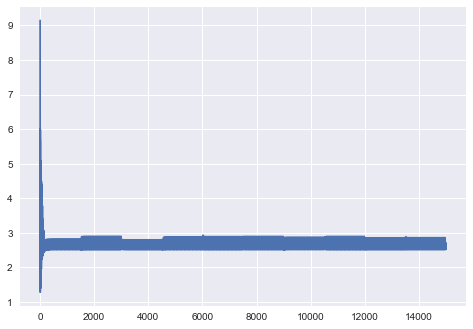

In [319]:
print(theta)
print(optw)
plt.plot(np.log(error))
plt.show()

In [320]:
theta = rnd.normal(size = 5)#rnd.randint(-10, 10, size = 5) + rnd.normal(size = 5)*50
error = [objective_function(theta, S)]

for epoch in xrange(10):
    rnd.shuffle(S)
    batchSize = 15
    batches = [S[i:i + batchSize] for i in xrange(0, len(S), batchSize)]
    for i in xrange(30):
        for _S in batches:
            theta -= 0.01*dx(theta, _S)
            error.append(objective_function(theta, _S))

[-6.78353903  5.00547098 -2.95057146  6.14116127  6.98814919]
[-7  5 -3  6  7]


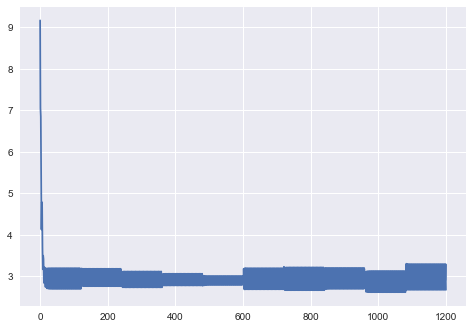

In [321]:
print(theta)
print(optw)
plt.plot(np.log(error))
plt.show()